## Estudo sobre o algoritmo de Simmulated Annealing (SA)


Primeiro eu vou traduzir um código de Python para Julia que mexa em um parâmetro apenas.

Vídeo: https://www.youtube.com/watch?v=C86j1AoMRr0

Artigo explicando o algoritmo em Python: https://medium.com/swlh/how-to-implement-simulated-annealing-algorithm-in-python-ab196c2f56a0


Artigo com algoritmo em Python e Matlab: http://apmonitor.com/me575/index.php/Main/SimulatedAnnealing

Depois eu vou procurar códigos de Python ou Matlab com vários parâmetros e traduzir para Julia




### Exemplo com 2 parâmetros

Exemplo baseado em http://apmonitor.com/me575/index.php/Main/SimulatedAnnealing: 

Encontrar o mínimo da seguinte função

$$ obj = 0.2 + x_{1}^{2} +x_{2}^{2} − 0.1 \cos(6\pi x_{1}) − 0.1 \cos(6 \pi x_{2}) $$

In [1]:
using Statistics
using LinearAlgebra
using Distributions
using Gadfly

Vamos criar a função objetivo. Ela toma um array $x$ contendo os parâmetros para $x_{1}$ e $x_{2}$

In [2]:
#definindo a função objetivo
function f(x)
    
    x1=x[1]
    x2=x[2]
    
    obj = 0.2 * x1^2 + x2^2 - 0.1 * cos(6 * pi * x1) - 0.1 * cos(6 * pi * x2)
    
    return obj
end

@show f([0.2, 0.2])

f([0.2, 0.2]) = 0.20980339887498953


0.20980339887498953

Simmulated Annealing

In [3]:
# Number of cycles
n = 100
# Number of trials per cycle
m = 50
# Number of accepted solutions
na = 0.0
# Probability of accepting worse solution at the start
p1 = 0.7
# Probability of accepting worse solution at the end
p50 = 0.001

# Initial temperature
t1 = -1.0/log(p1)
# Final temperature
t50 = -1.0/log(p50)

# Fractional reduction every cycle
frac = (t50/t1)^(1.0/(n-1.0))

0.9705085148892776

In [4]:
t50

0.14476482730108395

In [5]:
# Start location
x_start = [0.8, -0.5]

# Initialize x

#(n) linhas para os n ciclos, 2 colunas para caber o x de cada tentativa
x = zeros(n,2)


x[1,:] = x_start

xi = zeros(2)
xi = x_start
na = na + 1.0

1.0

In [6]:
xi[1]

0.8

In [7]:
# Current best results so far
xc = zeros(2)
xc = x[1,:]
fc = f(xi) #fcurrent


fs = zeros(n)
fs[1] = fc
# Current temperature
t = t1

2.8036732520571284

In [8]:
t1

2.8036732520571284

In [9]:
#primeiro a gente fala qual é a distribuição e depois a gente pede uma amostra aleatória dela
using Distributions
U = Uniform(0,1)
rand(U)

0.9528984945154138

In [10]:
# DeltaE Average
DeltaE_avg = 0.0
U = Uniform(0,1)
for i in 1:n
    println("Cycle: ", i," with Temperature: ", t, "fc: ", fc)
    
    for j in 1:m
        # Generate new trial points
        #atualiza o xc somando uma amostra aleatória da U(0,1) e subtraindo 0.5
        xi[1] = xc[1] + rand(U) - 0.5
        xi[2] = xc[2] + rand(U) - 0.5
        
        # Clip to upper and lower bounds
        xi[1] = max(min(xi[1],1.0),-1.0)
        xi[2] = max(min(xi[2],1.0),-1.0)
        
        DeltaE = abs(f(xi)-fc)
        
        if (f(xi)>fc)
            # Initialize DeltaE_avg if a worse solution was found
            #   on the first iteration
            if (i==1 && j==1) 
                DeltaE_avg = DeltaE
                
            end
            
            # objective function is worse
            # generate probability of acceptance
            p = exp(-DeltaE/(DeltaE_avg * t))
            # determine whether to accept worse point
            if (rand(U)<p)
                # accept the worse solution
                accept = true
            else
                # don't accept the worse solution
                accept = false
            
            end
            
            
        else
            #f(xi) <= fc
            accept = true
            
        
        end
        
        if(accept==true)
            # update currently accepted solution
            xc[1] = xi[1]
            xc[2] = xi[2]
            fc = f(xc)
            
            # increment number of accepted solutions
            na = na + 1.0
            # update DeltaE_avg
            DeltaE_avg = (DeltaE_avg * (na-1.0) +  DeltaE) / na
            
        end
    
    #j loop
    end
    
    
    # Record the best x values at the end of every cycle
    x[i, 1] = xc[1]
    x[i, 2] = xc[2]
    fs[i] = fc
    # Lower the temperature for next cycle
    t = frac * t

    
    
    
    
    #i loop
end


#searches for the minimum at vector fs
fmin, imin = findmin(fs)
xmin = x[imin,:]


#print solution
print("Best solution: ", xmin)
print("Best objective: ", fmin)

Cycle: 1 with Temperature: 2.8036732520571284fc: 0.5589016994374947
Cycle: 2 with Temperature: 2.7209887640887547fc: 0.02227040362130013
Cycle: 3 with Temperature: 2.640742764466188fc: 0.5086911997131415
Cycle: 4 with Temperature: 2.5628633385466855fc: 0.5155703126411989
Cycle: 5 with Temperature: 2.4872806925571194fc: 0.4685000677007688
Cycle: 6 with Temperature: 2.413927091046384fc: 0.35731481702696766
Cycle: 7 with Temperature: 2.34273679618242fc: 0.3282543500616232
Cycle: 8 with Temperature: 2.2736460088394645fc: 0.3302366599632053
Cycle: 9 with Temperature: 2.206592811422722fc: 0.18451353228758327
Cycle: 10 with Temperature: 2.141517112379222fc: 0.13412880485915485
Cycle: 11 with Temperature: 2.078360592345133fc: 0.39534009782493335
Cycle: 12 with Temperature: 2.017066651881274fc: 0.004634003255585092
Cycle: 13 with Temperature: 1.9575803607499829fc: -0.13516092132465657
Cycle: 14 with Temperature: 1.8998484086878822fc: 0.17238338635835138
Cycle: 15 with Temperature: 1.84381905763

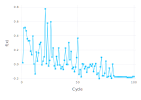

In [11]:
plot(x=collect(1:1:n), y=fs, Geom.line, Geom.point,
    Guide.xlabel("Cycle"),
    Guide.ylabel("f(x)"))

### Código Matlab

https://www.mathworks.com/matlabcentral/fileexchange/33109-simulated-annealing-optimization

Vou transcrever para checar se temos os mesmos resultados do exemplo 1


Note que a função f() é a mesma utilizada acima no exemplo anterior

In [26]:
function mu_inv(y, mu)
    
    
    #entender porque tem 1 somando em mu
    #entender porque tem 1 subtraindo de abs(y)
    x = (((1 .+ mu) .^ abs.(y) .- 1)/mu) .* sign.(y)
    
    return x
    
end 

mu_inv (generic function with 1 method)

In [27]:
#   INPUTS: 
#          f = a function handle
#          x0 = an initial guess for the minimun
#          l = a lower bound for minimun
#          u = an upper bound for minimun
#          Mmax = maximun number of temperatures
#          TolFun = tolerancia de la función


f = f


x0 = [0.8, -0.5] #x_start
l = [-1.0, -1.0] #lowerbounds
u = [1.0, 1.0] #upperbounds
Mmax = 50 #number of cycles

nchutes = 50 #number of trials per cycle







100

In [28]:
#inicializando o algoritmo
x = x0
fx = f(x0)
f0 = fx

0.5589016994374947

In [29]:
fvals = zeros(Mmax)

100-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [136]:
(1 < 2) == 1

true

In [147]:
function sim_anl(f, x0, l, u, Mmax, nchutes)
    
    
    if size(x0,1)<6
        TolFun=1e-4;
        
    elseif size(x0,1)<5
        Mmax=100;
    end

    
    
    
    #inicializando o algoritmo
    x = x0
    fx = f(x0)
    f0 = fx
    
    #para guardar os valores
    fvals = zeros(Mmax)
    xvals = zeros(Mmax, size(x0,1))


    #Main loop simulates de annealing from a high temperature to zero in Mmax iterations.
    for m in 1:Mmax
        #We calculate T as the inverse of temperature.
        #Boltzman constant = 1
        T=m/Mmax
        mu=10^(T*100)


        #For each temperature we take 500 test points to simulate reach termal
        #equilibrium.
        for k in 1:nchutes

            #We generate new test point using mu_inv function [3]        
            dx= mu_inv(2*rand(size(x,1)).-1, mu).*(u-l) 
            x1=x.+dx 
            #Next step is to keep solution within bounds
            x1=(x1 < l).*l+(l <= x1).*(x1 <= u).*x1+(u < x1).*u 


            #We evaluate the function and the change between test point and
            #current point
            fx1=f(x1) 

            df=fx1-fx

            #If the function variation,df, is <0 we take test point as current
            #point. And if df>0 we use Metropolis [5] condition to accept or
            #reject the test point as current point.
            #We use eps and TolFun to adjust temperature [4].   

            #retirei eps porque não estava definido antes. Cadê o cabo azul?
            if ((df < 0 || rand() < exp(-T*df/(abs(fx))/TolFun))==1)
                x=x1 
                fx=fx1 
            end

            #If the test point's solution (fx1) is better than current solution (fx), we take
            #current point as cuyrrent solution.       
            if ((fx1 < f0) ==1)
                x0=x1
                f0=fx1
            end   


            #record the value of the best solution of each cycle
            fvals[m] = f0
            xvals[m,:] .= x0

            #minha tentativa
    #         if(fx1 < fx ==1)
    #         x=x1 
    #         fx=fx1 
    #         end   
        end

    

    end
    
    
    
    return f0, x, fvals, xvals
end




sim_anl (generic function with 1 method)

In [148]:
f = f
x0 = [0.8, -0.5] #x_start
l = [-1.0, -1.0] #lowerbounds
u = [1.0, 1.0] #upperbounds
Mmax = 50 #number of cycles

nchutes = 50 #number of trials per cycle

fx, x, fvals, xvals = sim_anl(f, x0, l, u, Mmax, nchutes);



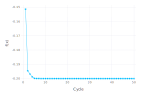

In [149]:
plot(x=collect(1:1:size(fvals,1)), y=fvals, Geom.line, Geom.point,
    Guide.xlabel("Cycle"),
    Guide.ylabel("f(x)"))

### Exemplo de outra função objetivo



Também de:  https://www.mathworks.com/matlabcentral/fileexchange/33109-simulated-annealing-optimization
The six-hump camelback function:


%  camel= @(x)(4-2.1*x(1).^2+x(1).^4/3).*x(1).^2+x(1).*x(2)+4*(x(2).^2-1).*x(2).^2;


%  has a doble minimun at f(-0.0898,0.7126) = f(0.0898,-0.7126) = -1.0316


%  this code works with it as follows:

%  [x0,f0]=sim_anl(camel,[0,0],[-10,-10],[10,10],400)

%  and we get:

%  x0=[-0.0897 0.7126]

In [150]:
function camel(x)
    
    x1=x[1]
    
    x2=x[2]
    
    return (4-2.1*x1.^2+x1.^4/3).*x1.^2+x1.*x2+4*(x2.^2-1).*x2.^2
    
end


x_start = [0,0]
camel(x_start)

0.0

In [151]:
fx, x, fvals, xvals = sim_anl(camel, [0,0], [-10,-10],[10,10], 1000, 600);

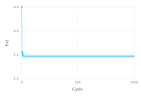

In [152]:
plot(x=collect(1:1:size(fvals,1)), y=fvals, Geom.line, Geom.point,
    Guide.xlabel("Cycle"),
    Guide.ylabel("f(x)"))

In [153]:
fx

-1.0316284357391798

In [154]:
findmin(fvals)

(-1.0316284357391798, 922)

In [155]:
xvals[922,:]

2-element Array{Float64,1}:
  0.08990914768472806
 -0.7126667257716001

##### it works!